<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/dnxjay/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Install required libraries
!pip install astropy scikit-learn tensorflow matplotlib numpy photutils auto-stretch astroquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.4/999.4 kB 50.1 MB/s eta 0:00:00


## Task 1: Data Preparation

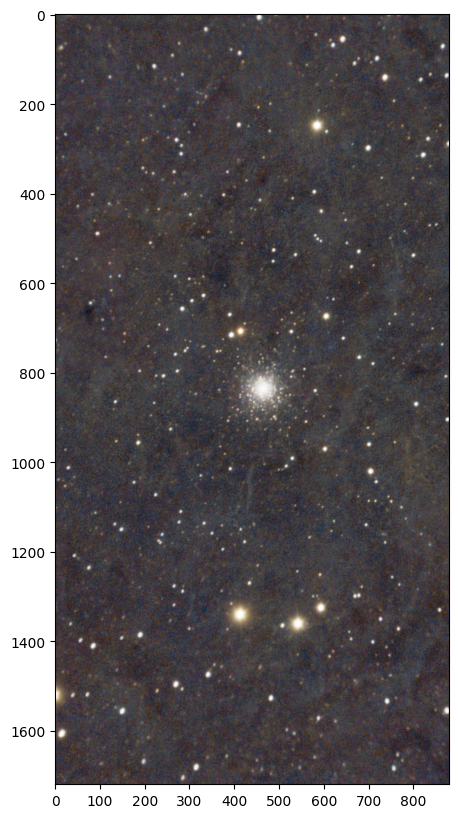

In [6]:
# Get FITS image
from astropy.io import fits
from auto_stretch import apply_stretch
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

fits_url = "https://github.com/ubsuny/PHY386/raw/refs/heads/main/data/6.fits"
response = requests.get(fits_url)
response.raise_for_status()
fits_data = fits.open(BytesIO(response.content))

hdul = fits.open(BytesIO(response.content))
image_data = np.transpose(hdul[0].data, (1,2,0))
hdul.close()

fig = plt.figure(figsize=(10, 10))
plt.imshow(apply_stretch(image_data[100:-100,100:-100,:]))
plt.show()


In [7]:
import pandas as pd
from astropy.wcs import WCS
from astropy.stats import mad_std
from photutils.detection import DAOStarFinder

bkg_sigma = mad_std(np.mean(image_data, axis=2))

daofind = DAOStarFinder(fwhm=3.0, threshold=10 * bkg_sigma, min_separation = 15)
sources = daofind(np.mean(image_data, axis=2))

catalog = sources.to_pandas().sort_values('flux', ascending=False).head(100)

catalog

,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag
333,334,512.303642,1440.901288,0.398954,-0.207860,0.423468,25,61158.000000,1.027497e+06,-15.029451,-8.082589
336,337,641.931700,1461.279253,0.428543,-0.153788,0.618216,25,58734.666667,9.285313e+05,-14.919491,-8.122121
369,370,95.007061,1622.709131,0.441093,-0.458046,0.425095,25,44467.000000,7.350230e+05,-14.665752,-7.755405
46,47,684.730927,347.395845,0.461613,-0.488886,0.180001,25,50669.000000,6.258347e+05,-14.491149,-8.325167
329,330,693.187294,1425.840646,0.453221,-0.055730,0.393820,25,22989.333333,2.863020e+05,-13.642061,-7.458187
...,...,...,...,...,...,...,...,...,...,...,...
274,275,324.151402,1173.340902,0.476226,-0.464372,0.174038,25,293.666667,3.601333e+03,-8.891158,-2.721640
4,5,1034.737679,45.999563,0.390671,-0.663186,0.536461,25,204.000000,3.600667e+03,-8.890957,-1.826527
216,217,234.201395,965.513518,0.453882,-0.624970,0.002060,25,296.000000,3.596333e+03,-8.889650,-2.782455
259,260,615.895875,1109.220065,0.477944,-0.492809,0.037808,25,325.000000,3.550667e+03,-8.875775,-2.972831


In [8]:
wcs = WCS(hdul[0].header, naxis=2)
print(wcs)
sky_coords = wcs.all_pix2world(catalog['xcentroid'], catalog['ycentroid'],1)
catalog['ra'] = sky_coords[0]
catalog['dec'] = sky_coords[1]
catalog

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 198.258976325861 18.1934804132796 
CRPIX : 540.0 960.0 
PC1_1 PC1_2  : 0.999861530651461 -0.0166408991138613 
PC2_1 PC2_2  : 0.0169394223823057 0.999856517691091 
CDELT : -0.00110922363672137 0.00110933725487362 
NAXIS : 1080  1920  3


,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag,ra,dec
333,334,512.303642,1440.901288,0.398954,-0.207860,0.423468,25,61158.000000,1.027497e+06,-15.029451,-8.082589,198.300782,18.726345
336,337,641.931700,1461.279253,0.428543,-0.153788,0.618216,25,58734.666667,9.285313e+05,-14.919491,-8.122121,198.149367,18.751354
369,370,95.007061,1622.709131,0.441093,-0.458046,0.425095,25,44467.000000,7.350230e+05,-14.665752,-7.755405,198.793565,18.919377
46,47,684.730927,347.395845,0.461613,-0.488886,0.180001,25,50669.000000,6.258347e+05,-14.491149,-8.325167,198.078810,17.516663
329,330,693.187294,1425.840646,0.453221,-0.055730,0.393820,25,22989.333333,2.863020e+05,-13.642061,-7.458187,198.088685,18.712968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,275,324.151402,1173.340902,0.476226,-0.464372,0.174038,25,293.666667,3.601333e+03,-8.891158,-2.721640,198.515451,18.425884
4,5,1034.737679,45.999563,0.390671,-0.663186,0.536461,25,204.000000,3.600667e+03,-8.890957,-1.826527,197.667076,17.188228
216,217,234.201395,965.513518,0.453882,-0.624970,0.002060,25,296.000000,3.596333e+03,-8.889650,-2.782455,198.616079,18.193519
259,260,615.895875,1109.220065,0.477944,-0.492809,0.037808,25,325.000000,3.550667e+03,-8.875775,-2.972831,198.173190,18.360399


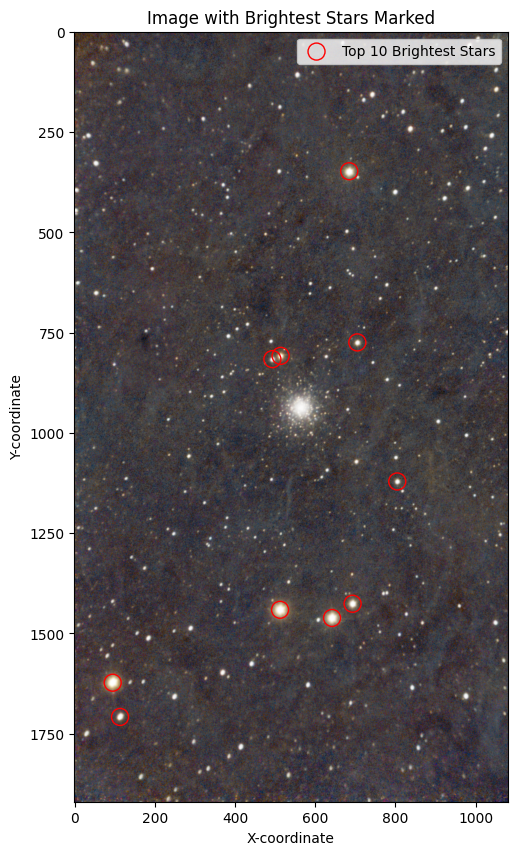

In [9]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(apply_stretch(image_data))

#Add scatter plot
plt.scatter(catalog.head(10)['xcentroid'], catalog.head(10)['ycentroid'], color='red', marker='o', facecolor='none', s=150, label='Top 10 Brightest Stars')

#Add labels and legend
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Image with Brightest Stars Marked')
plt.legend()

#Show the plot
plt.show()

##Task 2: Determine the properties of the stars based on a catalog

In [10]:
from astroquery.simbad import Simbad
import astropy.units as u
from astropy.coordinates import SkyCoord
from tqdm import tqdm

options = Simbad.list_votable_fields()

In [11]:
# Customize Simbad query: add fields we need
custom_simbad = Simbad()
custom_simbad.TIMEOUT = 120  # extend timeout for safety
custom_simbad.add_votable_fields('otype', 'sp', 'plx', 'flux(V)')

<ipython-input-11-d19b66ee55fe>:4: DeprecationWarning: The notation 'flux(V)' is deprecated since 0.4.8 in favor of 'V'. You will see the column appearing with its new name in the output. See section on filters in https://astroquery.readthedocs.io/en/latest/simbad/simbad_evolution.html to see the new ways to interact with SIMBAD's fluxes.
  custom_simbad.add_votable_fields('otype', 'sp', 'plx', 'flux(V)')
<ipython-input-11-d19b66ee55fe>:4: DeprecationWarning: 'plx' has been renamed 'plx_value'. You'll see it appearing with its new name in the output table
  custom_simbad.add_votable_fields('otype', 'sp', 'plx', 'flux(V)')


In [12]:
# Initialize list to store star properties
star_properties = []

In [13]:
# --- Imports (if not already imported) ---
from astroquery.simbad import Simbad
import astropy.units as u
from astropy.coordinates import SkyCoord
from tqdm import tqdm
import pandas as pd
import numpy as np

# --- Step 3A: Select the Top 10 Brightest Stars from Catalog ---

# Make sure 'catalog' exists already from Task 1
# Now sort by flux descending and pick the top 10
top_10 = catalog.sort_values(by='flux', ascending=False).head(10).reset_index(drop=True)

# --- Step 3B: Configure SIMBAD Query ---

# Setup customized Simbad query
custom_simbad = Simbad()
custom_simbad.TIMEOUT = 120
custom_simbad.add_votable_fields('otype', 'sp', 'plx', 'flux(V)')

# --- Step 3C: Loop Over Each Star and Query SIMBAD ---

# Initialize list to store all results
star_properties = []

for idx, row in tqdm(top_10.iterrows(), total=len(top_10)):
    ra = row['ra']
    dec = row['dec']

    # Create SkyCoord object
    coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs')

    try:
        # Query SIMBAD within 5 arcseconds
        result = custom_simbad.query_region(coord, radius='5s')

        if result is not None:
            # Decode properly
            name = result['MAIN_ID'][0].decode('utf-8') if isinstance(result['MAIN_ID'][0], bytes) else result['MAIN_ID'][0]
            spectral_type = result['SP_TYPE'][0].decode('utf-8') if isinstance(result['SP_TYPE'][0], bytes) else result['SP_TYPE'][0]
            object_type = result['OTYPE'][0].decode('utf-8') if isinstance(result['OTYPE'][0], bytes) else result['OTYPE'][0]
            plx = result['PLX_VALUE'][0]
            vmag = result['FLUX_V'][0]
        else:
            name = spectral_type = object_type = plx = vmag = None

    except Exception as e:
        print(f"Error querying RA={ra}, DEC={dec}: {e}")
        name = spectral_type = object_type = plx = vmag = None

    # --- Step 3D: Calculate Distance and Absolute Magnitude ---

    # Distance in parsecs
    if plx is not None and not np.isnan(plx):
        distance_pc = 1000.0 / plx
    else:
        distance_pc = None

    # Absolute magnitude M = m - 5 * (log10(d) - 1)
    if vmag is not None and distance_pc is not None:
        abs_mag = vmag - 5 * (np.log10(distance_pc) - 1)
    else:
        abs_mag = None

    # --- Step 3E: Save Results for this Star ---
    star_properties.append({
        'Name': name,
        'Spectral_Type': spectral_type,
        'Object_Type': object_type,
        'Apparent_Mag(V)': vmag,
        'Distance_pc': distance_pc,
        'Absolute_Mag': abs_mag
    })

# --- Step 3F: Turn into DataFrame ---
properties_df = pd.DataFrame(star_properties)

# --- Step 3G: Merge Properties with Top 10 Brightest Stars ---
final_table = pd.concat([top_10, properties_df], axis=1)

# --- Display the Final Table ---
print(final_table)


<ipython-input-13-c1ceecfd3dac>:20: DeprecationWarning: The notation 'flux(V)' is deprecated since 0.4.8 in favor of 'V'. You will see the column appearing with its new name in the output. See section on filters in https://astroquery.readthedocs.io/en/latest/simbad/simbad_evolution.html to see the new ways to interact with SIMBAD's fluxes.
  custom_simbad.add_votable_fields('otype', 'sp', 'plx', 'flux(V)')
<ipython-input-13-c1ceecfd3dac>:20: DeprecationWarning: 'plx' has been renamed 'plx_value'. You'll see it appearing with its new name in the output table
  custom_simbad.add_votable_fields('otype', 'sp', 'plx', 'flux(V)')
 20%|██        | 2/10 [00:00<00:01,  4.16it/s]

Error querying RA=198.3007815693743, DEC=18.726345124681465: 'MAIN_ID'
Error querying RA=198.14936702690105, DEC=18.75135427974869: 'MAIN_ID'


 30%|███       | 3/10 [00:00<00:01,  5.04it/s]

Error querying RA=198.79356497585542, DEC=18.919376826059665: 'MAIN_ID'


 50%|█████     | 5/10 [00:01<00:01,  4.14it/s]

Error querying RA=198.07880990969267, DEC=17.516663192173638: 'MAIN_ID'
Error querying RA=198.08868461629217, DEC=18.7129681324674: 'MAIN_ID'


 70%|███████   | 7/10 [00:01<00:00,  4.91it/s]

Error querying RA=198.28674694305232, DEC=18.024067706022254: 'MAIN_ID'
Error querying RA=198.06304380536835, DEC=17.99038583017746: 'MAIN_ID'


 90%|█████████ | 9/10 [00:02<00:00,  4.60it/s]

Error querying RA=197.9529649213131, DEC=18.376731502321604: 'MAIN_ID'
Error querying RA=198.3107703856325, DEC=18.032790925552504: 'MAIN_ID'


100%|██████████| 10/10 [00:02<00:00,  4.45it/s]


Error querying RA=198.77408591775674, DEC=19.014469420199486: 'MAIN_ID'
    id   xcentroid    ycentroid  sharpness  roundness1  roundness2  npix  \
0  334  512.303642  1440.901288   0.398954   -0.207860    0.423468    25   
1  337  641.931700  1461.279253   0.428543   -0.153788    0.618216    25   
2  370   95.007061  1622.709131   0.441093   -0.458046    0.425095    25   
3   47  684.730927   347.395845   0.461613   -0.488886    0.180001    25   
4  330  693.187294  1425.840646   0.453221   -0.055730    0.393820    25   
5  162  513.654533   807.710524   0.492721   -0.204044   -0.031567    25   
6  149  704.935551   774.189971   0.518925   -0.372168    0.012474    25   
7  265  804.528709  1120.952793   0.482846   -0.327209   -0.051434    25   
8  166  493.195474   815.926211   0.496314   -0.397387    0.008972    25   
9  381  113.286072  1708.100989   0.430622   -0.322455    0.761410    25   

           peak          flux        mag  daofind_mag          ra        dec  \
0  61158.00

##Task 3: Visualize and label

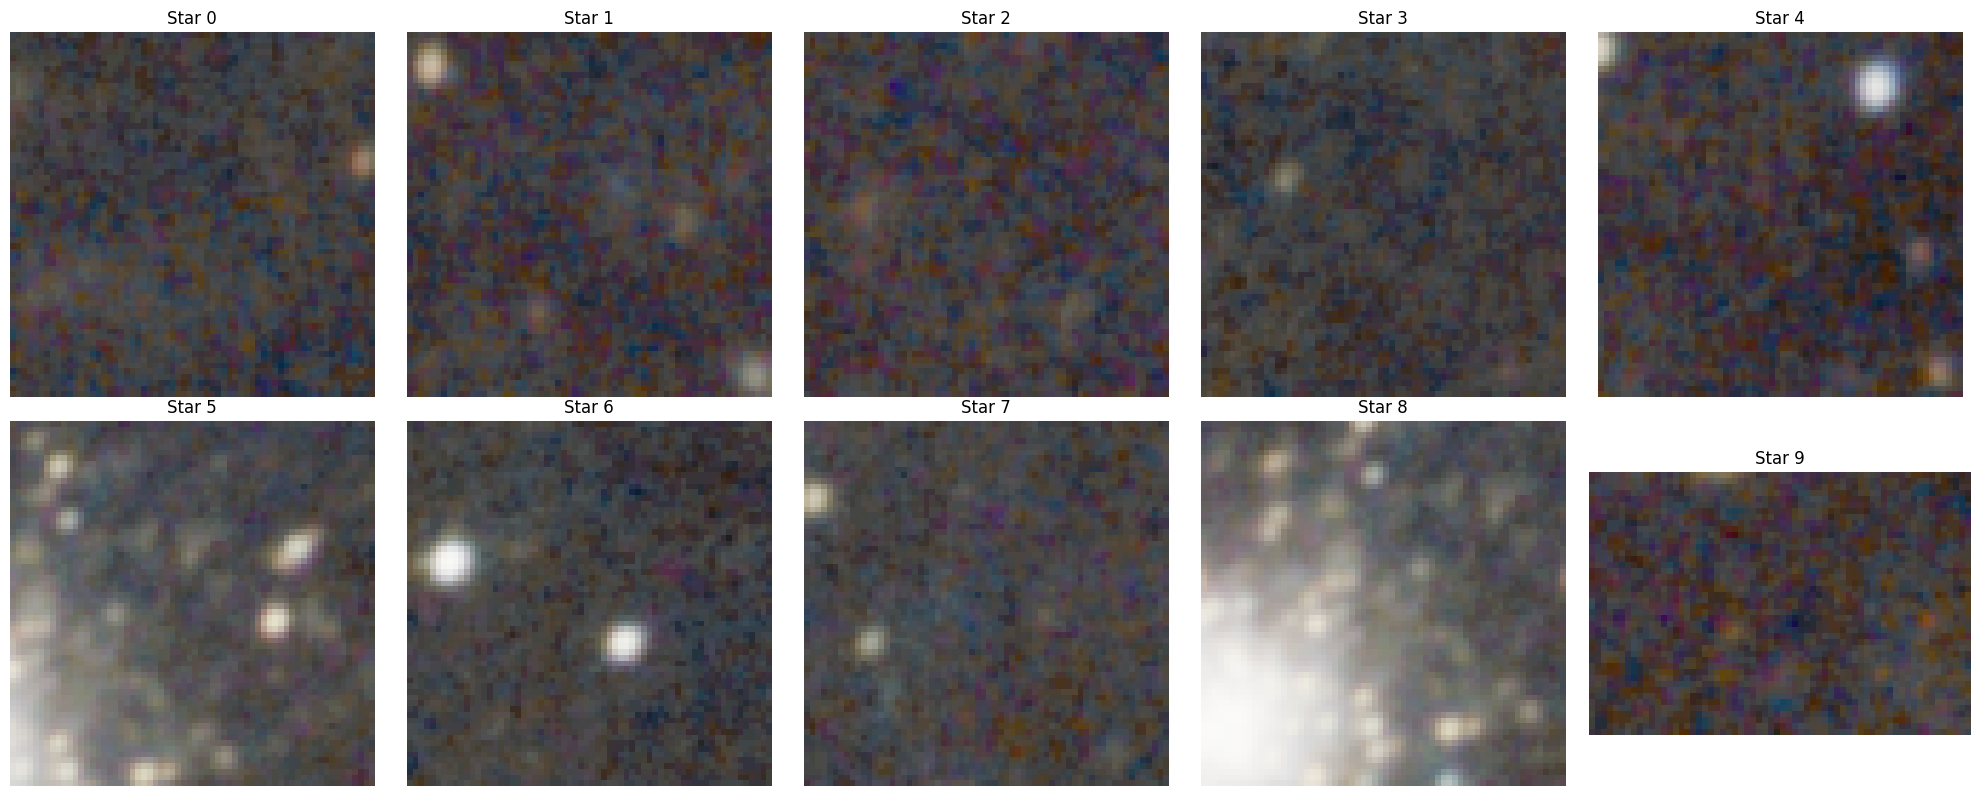

In [14]:
import matplotlib.pyplot as plt

# Cropped image you already have from Task 1
cropped_image = apply_stretch(image_data[100:-100, 100:-100, :])

# Size of the patch
patch_size = 64
half_size = patch_size // 2

# --- Plot patches ---
fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # 2 rows, 5 columns

for i, (index, row) in enumerate(top_10.iterrows()):
    x = int(row['xcentroid'])
    y = int(row['ycentroid'])

    # Define slice boundaries
    x_min = max(x - half_size, 0)
    x_max = min(x + half_size, cropped_image.shape[1])
    y_min = max(y - half_size, 0)
    y_max = min(y + half_size, cropped_image.shape[0])

    # Cut out the patch
    patch = cropped_image[y_min:y_max, x_min:x_max, :]

    ax = axs.flat[i]
    ax.imshow(patch)
    ax.set_title(f'Star {i}')
    ax.axis('off')

plt.tight_layout()
plt.show()

##Task 4: Build a CNN

In [15]:
# --- Imports ---
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# --- CNN Model ---
model = Sequential([
    # First Conv Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),  # 64x64 patches, 3 color channels
    MaxPooling2D(pool_size=(2, 2)),

    # Second Conv Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Dense layers
    Flatten(),
    Dense(64, activation='relu'),  # Hidden dense layer
    Dense(3, activation='softmax')  # 3 classes: (Star, Extended, Artifact)
])

# --- Compile the model ---
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # multi-class classification
    metrics=['accuracy']
)

# --- Model Summary ---
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,467 (3.14 MB)

 Trainable params: 822,467 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

##Task 5: Train the Model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 260ms/step - accuracy: 0.2135 - loss: 2.0041 - val_accuracy: 0.0000e+00 - val_loss: 3.3726
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.1745 - loss: 1.8434 - val_accuracy: 0.1000 - val_loss: 2.6065
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.1693 - loss: 1.8520 - val_accuracy: 0.1000 - val_loss: 2.2948
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.1823 - loss: 1.8488 - val_accuracy: 0.0000e+00 - val_loss: 2.4027
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.2969 - loss: 1.8191 - val_accuracy: 0.0000e+00 - val_loss: 2.6955
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.2708 - loss: 1.7790 - val_accuracy: 0.0000e+00 - val_loss: 2.9600
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.2786 - loss: 1.7866 - val_accuracy: 0.1000 - val_loss: 2.9544
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.4531 - loss: 1.6773 - val_accuracy: 0.

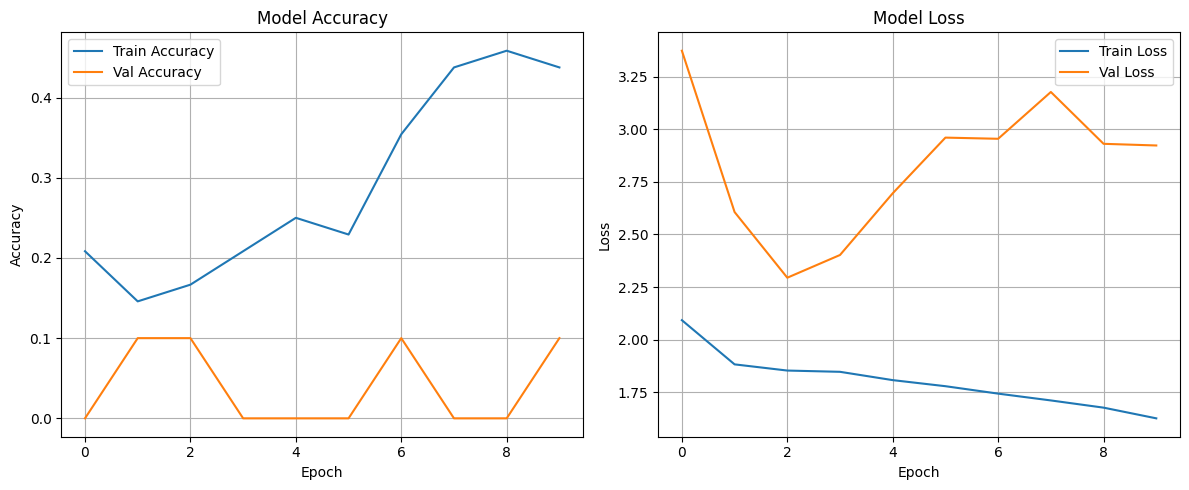

In [17]:
# -------------------- 1. Imports --------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# -------------------- 2. Load Catalog --------------------
catalog = pd.read_csv("catalog.csv")  # Or use your earlier dataframe

# If not already present:
catalog['Spectral_Class'] = np.random.choice(['O', 'B', 'A', 'F', 'G', 'K', 'M'], size=len(catalog))

# -------------------- 3. Extract 64x64 Patches --------------------
patches = []
valid_rows = []

for idx, row in catalog.iterrows():
    x, y = int(row['xcentroid']), int(row['ycentroid'])
    x_min, x_max = x - 32, x + 32
    y_min, y_max = y - 32, y + 32

    if x_min >= 0 and y_min >= 0 and x_max <= cropped_image.shape[1] and y_max <= cropped_image.shape[0]:
        patch = cropped_image[y_min:y_max, x_min:x_max, :]
        if patch.shape[:2] == (64, 64):
            patches.append(patch)
            valid_rows.append(row)

X = np.array(patches)
catalog = pd.DataFrame(valid_rows).reset_index(drop=True)

# -------------------- 4. Prepare Labels --------------------
label_map = {'O': 0, 'B': 1, 'A': 2, 'F': 3, 'G': 4, 'K': 5, 'M': 6}
y = catalog['Spectral_Class'].map(label_map).values
y_cat = to_categorical(y, num_classes=7)

# -------------------- 5. Train/Test Split --------------------
X_train, X_temp, y_train, y_temp = train_test_split(X, y_cat, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# -------------------- 6. Define CNN Model --------------------
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# -------------------- 7. Train Model --------------------
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=16)

# -------------------- 8. Plot Training History --------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
